In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pynested_fit as pynf

In [2]:
pynf.__version__

'5.4.2'

In [3]:
def gauss(x, u, s):
    return np.exp(-(x-u)**2/(2*s**2)) * (1.0 / (np.sqrt(2 * np.pi) * s))

In [4]:
u = 0.0
s = 1.0
X = np.linspace(u - 10, u + 10, 200)
E = np.empty(200)
E.fill(0.1)
# Get a "random" function
Y = 5 * gauss(X, u + 5, s) + 15 * gauss(X, u - 5, s) * (np.sin(3 * X) + 1)

# Save the function
np.savetxt('ginterp.csv', np.vstack((X, Y, E)).T, delimiter=',')

# Divide the interpolator by 5, shift by 1 and a create an A and x_0 parameters for the calculations
np.savetxt('interp.csv', np.vstack((X - 1, Y / 5)).T, delimiter=',')

In [5]:
npc = pynf.Configurator(
    calculation_mode='DATA',
    datafiles=['ginterp.csv'],
    expressions=[r'f(x, A, x_0) = A\texttt{Interpolate}("interp.csv", x - x_0, 1.0)'],
    specstr='x,c,ce',
    params={
        'A': {'value': 2, 'min': 0.1, 'max': 10, 'step': -1},
        'x_0': {'value': 0, 'min': -2, 'max': 2, 'step': -1}
    }
)

output = npc.sample(output_mode='none')
print(output['params']['A'])
print(output['params']['x_0'])

{'ci_h68': 5.059533176342377, 'ci_h95': 5.076062214480645, 'ci_h99': 5.086735661709104, 'ci_l68': 5.0269198671814825, 'ci_l95': 5.009630606583004, 'ci_l99': 5.00067105161648, 'max': 5.043813417306714, 'mean': 5.043321738600614, 'median': 5.043663868927187, 'std': 0.01643159635630043}
{'ci_h68': 0.9955992788388295, 'ci_h95': 0.9973478389468542, 'ci_h99': 0.9984351631571289, 'ci_l68': 0.9921717920790074, 'ci_l95': 0.9904813978041889, 'ci_l99': 0.9891914572608429, 'max': 0.9938366970532712, 'mean': 0.9938805967682207, 'median': 0.993912765634571, 'std': 0.0017442578668022829}


In [6]:
cat nf_output_res.dat

 #############_FINAL_RESULTS_#####################################################################################
 N._of_trials:                                      1
 N._of_total_iteration:                          4960
 N._of_likelihood_calls_((1)*1.E+9+(2)):                     0               285009
 N._of_used_livepoints:                           200
 Final_evidence_(log):                     -89.554502988581220     
 Evidence_estimated_uncertainty_(log):     0.23796867658221804     
 Evidence_standard_deviation_(log):         0.0000000000000000     
 ------------------------------------------------------------------------------------------------------------------
 Max_likelihood_(log):  -77.267795538046755     
 Max_parameter_set: 
 A            5.0438134173067137     
 x_0         0.99383669705327116     
 -------------------------------------------------------------------------------------------------------------------
 Mean_value_and_standard_deviation_of_the_parameters
 A 

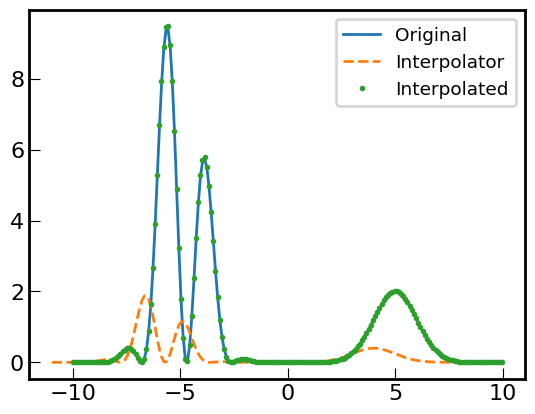

In [11]:
plt.plot(X, Y, label='Original')
plt.plot(X - 1, Y / 5, '--', label='Interpolator')
plt.plot(X - 1 + output['params']['x_0']['max'], Y / 5 * output['params']['A']['max'], '.',label='Interpolated')
plt.legend()